<a href="https://colab.research.google.com/github/snehamwagh/Text-classification-using-machine-learning/blob/main/DevifyX_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Load and prepare IMDb data
from tensorflow.keras.datasets import imdb
import pandas as pd

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_df = pd.DataFrame({"text": train_data, "label": train_labels})
print(train_df.head())

                                                text  label
0  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...      1
1  [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...      0
2  [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...      0
3  [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...      1
4  [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...      0


In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


In [5]:
from tensorflow.keras.datasets import imdb
import pandas as pd

# Load data (positive/negative reviews)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Convert to DataFrame for exploration
train_df = pd.DataFrame({"text": train_data, "label": train_labels})
print(train_df.head())

                                                text  label
0  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...      1
1  [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...      0
2  [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...      0
3  [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...      1
4  [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...      0


In [24]:
# Clean the text data
import re
from nltk.corpus import stopwords

def clean_text(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train_df['cleaned_text'] = train_df['original_text'].apply(clean_text)

display(train_df.head())

,text,label,original_text,cleaned_text
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...",1,? this film was just brilliant casting locatio...,film brilliant casting location scenery story ...
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...",0,? big hair big boobs bad music and a giant saf...,big hair big boobs bad music giant safety pin ...
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...",0,? this has to be one of the worst films of the...,one worst films 1990s friends watching film ta...
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...",1,? the ? ? at storytelling the traditional sort...,storytelling traditional sort many years event...
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...",0,? worst mistake of my life br br i picked this...,worst mistake life br br picked movie target 5...


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
# Decode integer sequences back to text
from tensorflow.keras.datasets import imdb

word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

train_df['original_text'] = train_df['text'].apply(decode_review)

print(train_df.head())

                                                text  label  \
0  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ...      1   
1  [1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,...      0   
2  [1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5...      0   
3  [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,...      1   
4  [1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1...      0   

                                       original_text  
0  ? this film was just brilliant casting locatio...  
1  ? big hair big boobs bad music and a giant saf...  
2  ? this has to be one of the worst films of the...  
3  ? the ? ? at storytelling the traditional sort...  
4  ? worst mistake of my life br br i picked this...  


In [25]:
# Create TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['cleaned_text'])
y_train = train_df['label']

print("TF-IDF features created successfully.")
print("Shape of X_train:", X_train.shape)

TF-IDF features created successfully.
Shape of X_train: (25000, 5000)


In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Train and evaluate Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

test_df = pd.DataFrame({"text": test_data, "label": test_labels})

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

test_df['original_text'] = test_df['text'].apply(decode_review)

def clean_text(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = re.findall(r'\b\w+\b', text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

test_df['cleaned_text'] = test_df['original_text'].apply(clean_text)

X_test = tfidf.transform(test_df['cleaned_text'])
y_test = test_df['label']

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.88


              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



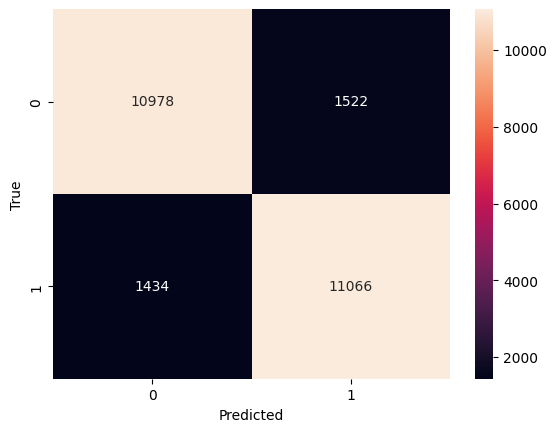

In [27]:
# Display classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(test_labels, y_pred))

cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()